In [1]:
import calendar
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

import data_preparation.preprocessing as preprocessing

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("../data/tournament_dataset/train.tsv", sep="\t")
df = preprocessing.add_derived_features(df)
df["log_n_players"] = np.log(df.n_players)

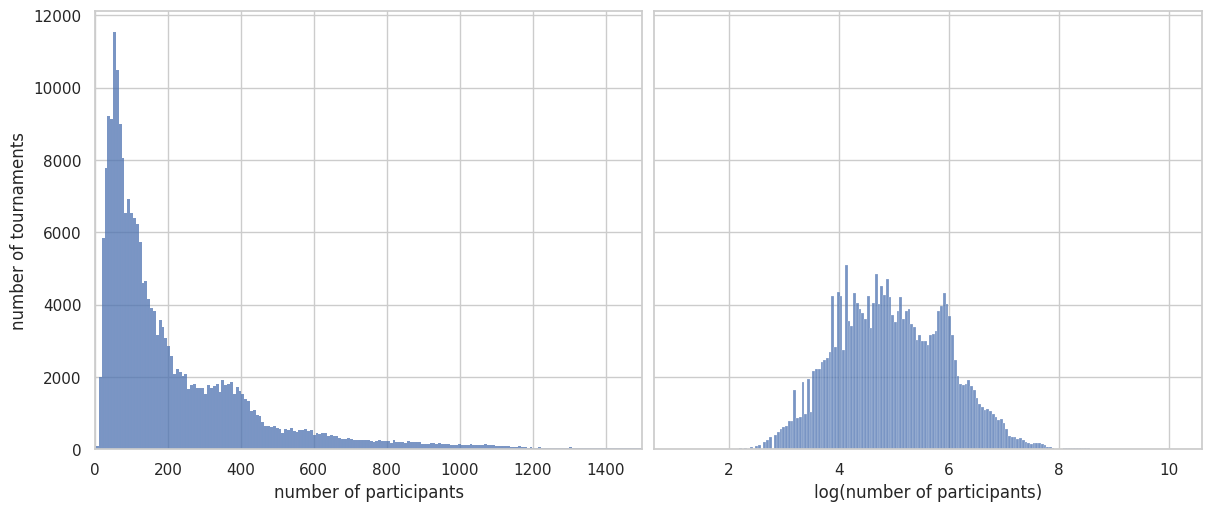

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5), layout="compressed", sharey=True)

sns.histplot(df.n_players, ax=axs[0])
axs[0].set_xlabel("number of participants")
axs[0].set_ylabel("number of tournaments")
axs[0].set_xlim(0, 1500)

sns.histplot(df.log_n_players, ax=axs[1])
axs[1].set_xlabel("log(number of participants)");

In [4]:
def test_feature(col, label, figw=None, figh=None, **kwargs):
    if figw is None:
        figw = plt.rcParams["figure.figsize"][0]
    if figh is None:
        figh = plt.rcParams["figure.figsize"][1]
    fig, ax = plt.subplots(figsize=(figw, figh))
    if "order" not in kwargs:
        kwargs["order"] = df.groupby(col).log_n_players.median().sort_values(ascending=False).index
    sns.violinplot(df, y=col, x="log_n_players", split=True, inner="quart", orient="h", color="#cae9f5", ax=ax, **kwargs)
    ax.set_ylabel(label)
    ax.set_xlabel("log(number of participants)")
    print(f"Kruskal-Wallis test: pvalue = {sp.stats.kruskal(*df.groupby(col).log_n_players.agg(list)).pvalue}")

Kruskal-Wallis test: pvalue = 0.0


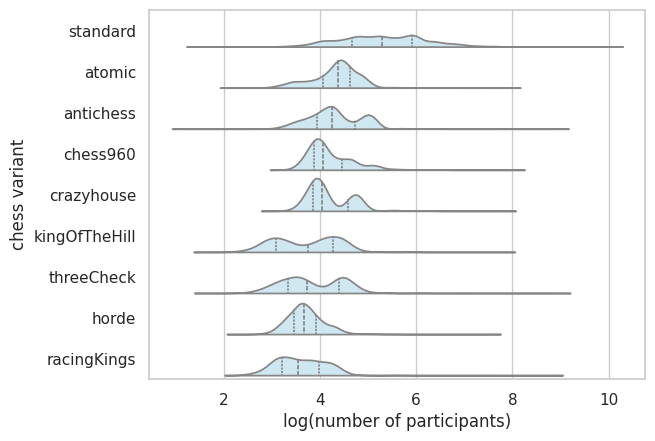

In [5]:
test_feature("variant", "chess variant")

Kruskal-Wallis test: pvalue = 0.0


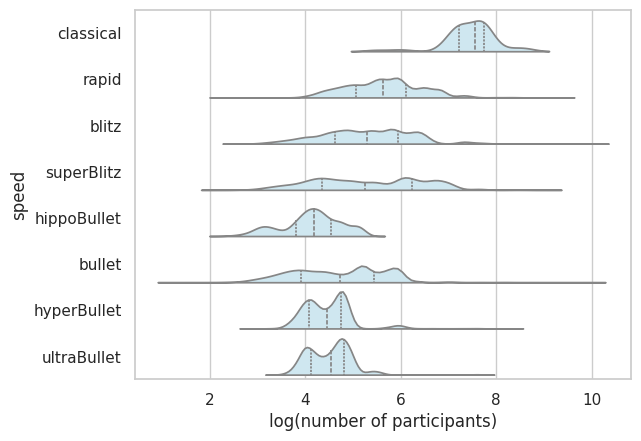

In [6]:
test_feature("speed", "speed", order=["classical", "rapid", "blitz", "superBlitz", "hippoBullet", "bullet", "hyperBullet", "ultraBullet"])

Kruskal-Wallis test: pvalue = 0.0


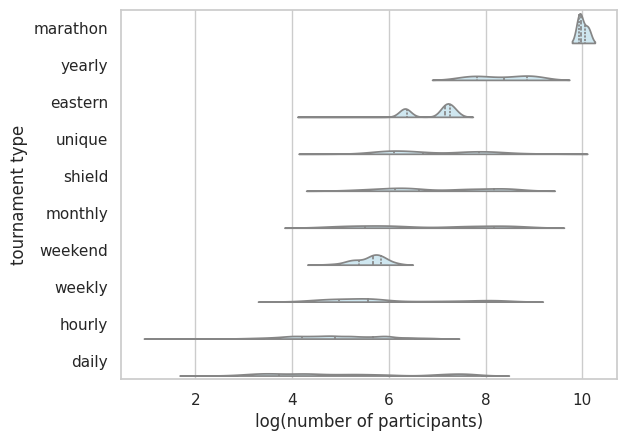

In [7]:
test_feature("freq", "tournament type")

Kruskal-Wallis test: pvalue = 2.3815162410369636e-33


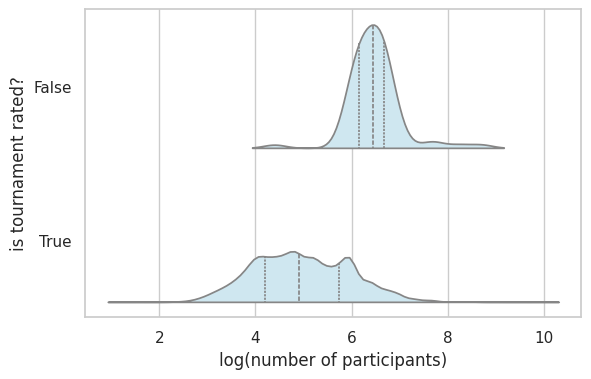

In [8]:
test_feature("rated", "is tournament rated?", figh=4)

Kruskal-Wallis test: pvalue = 1.3606314173845279e-198


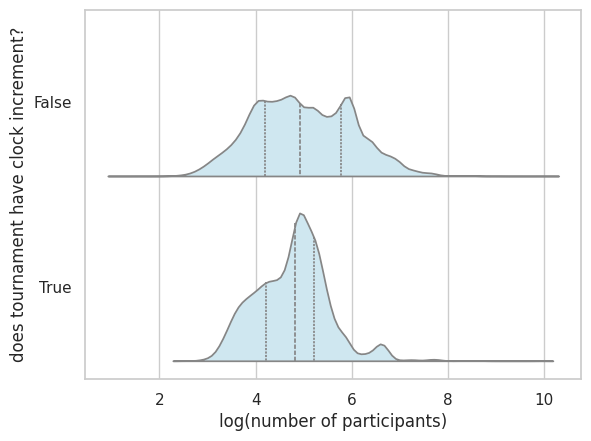

In [9]:
test_feature("has_clock_increment", "does tournament have clock increment?")

Kruskal-Wallis test: pvalue = 0.0


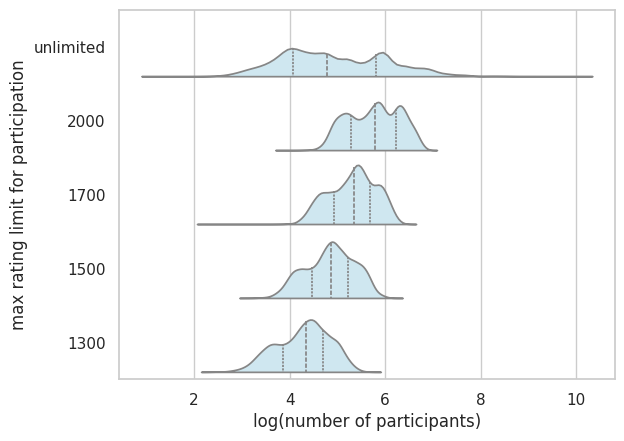

In [10]:
test_feature(
    df.max_rating.astype("Int32").astype(str).replace("<NA>", "unlimited"),
    "max rating limit for participation",
    order=["unlimited", "2000", "1700", "1500", "1300"]
)

Kruskal-Wallis test: pvalue = 1.090671370242191e-59


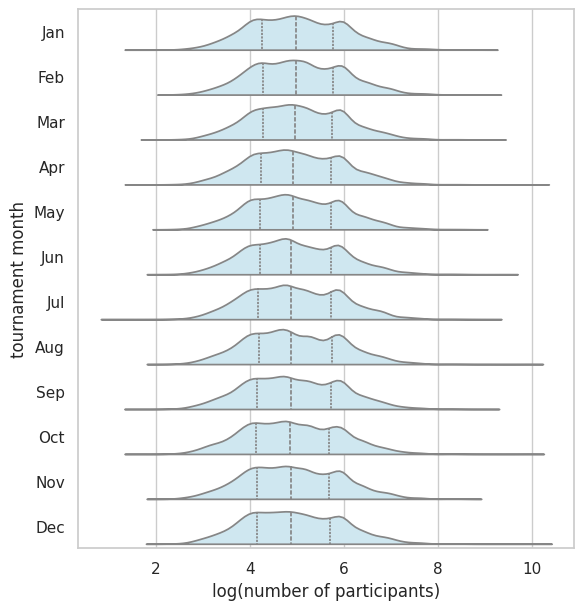

In [11]:
test_feature("starts_at_month", "tournament month", figh=7, order=range(1, 13), formatter=lambda x: calendar.month_abbr[x])

Kruskal-Wallis test: pvalue = 4.0699302501736256e-20


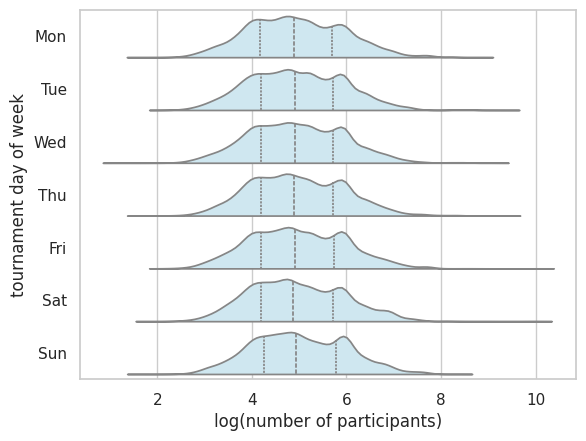

In [12]:
test_feature("starts_at_weekday", "tournament day of week", order=range(7), formatter=lambda x: calendar.day_abbr[x])

Kruskal-Wallis test: pvalue = 0.0


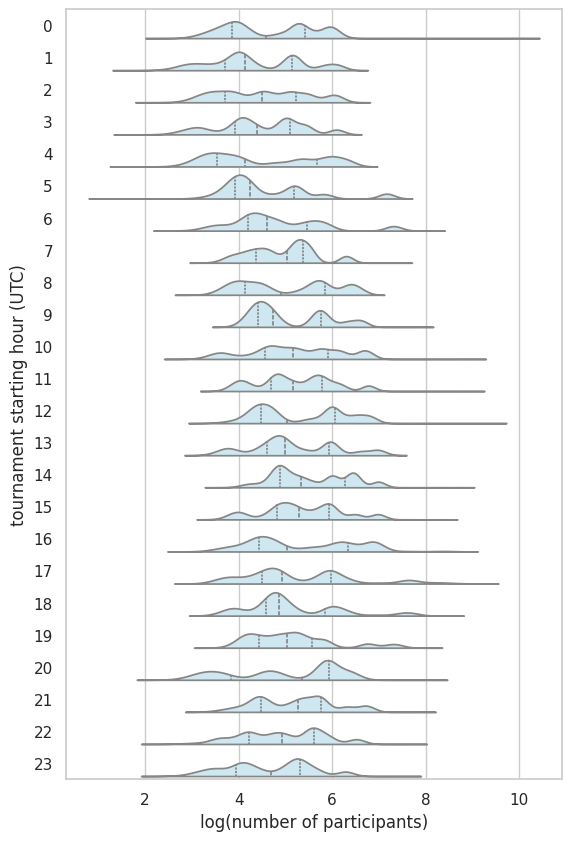

In [13]:
test_feature("starts_at_hour", "tournament starting hour (UTC)", figh=10, order=range(24))